In [1]:
import Useful_functions as uf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

/Users/luisalvarez/opt/anaconda3/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
all_responses_filtered = pd.read_csv("all_responses_filtered.csv")

all_responses_filtered.head()

,Unnamed: 0,Decoy,Item,Option_1,Option_2,Option_3,Choice,CatchTrials,Deliberation_RT,Choice_RT,Too_Slow,Survey_ID,CouplingCondition,PhantomCondition
0,0,F,Kitchen Scale,A,C,B,C,NaN,10000,620.0,0,40781,High coupling,Highly_desirable
1,1,C,Baby crib,C_A,B,A,A,NaN,10000,389.0,0,40781,High coupling,Highly_desirable
2,2,S,Baby high chair,A,B,S_B,B,NaN,10000,761.0,0,40781,High coupling,Highly_desirable
3,3,A,Leaf Blower,A,B,A_B,A,NaN,10000,308.0,0,40781,High coupling,Highly_desirable
4,4,P,Wifi extender,A,B,P_B,A,NaN,10000,586.0,0,40781,High coupling,Highly_desirable


In [3]:
decoy_S_df = all_responses_filtered[all_responses_filtered["Decoy"] == "S"]
decoy_C_df = all_responses_filtered[all_responses_filtered["Decoy"] == "C"]
decoy_A_df = all_responses_filtered[all_responses_filtered["Decoy"] == "A"]
decoy_P_df = all_responses_filtered[all_responses_filtered["Decoy"] == "P"]


### Similarity Decoy

In [4]:
decoy_S_TargetA_df = decoy_S_df.loc[decoy_S_df['Option_1'].str.contains('S_A') | decoy_S_df['Option_2'].str.contains('S_A') | decoy_S_df['Option_3'].str.contains('S_A')]
decoy_S_TargetB_df = decoy_S_df.loc[decoy_S_df['Option_1'].str.contains('S_B') | decoy_S_df['Option_2'].str.contains('S_B') | decoy_S_df['Option_3'].str.contains('S_B')]

decoy_S_Items_TargetA_df = uf.itemFreq_Decoy(decoy_S_TargetA_df, "Sim_Decoy")
decoy_S_Items_TargetB_df = uf.itemFreq_Decoy(decoy_S_TargetB_df, "Sim_Decoy")

item_list = decoy_S_TargetA_df["Item"].unique()
item_list = np.sort(item_list)

Sim_items_targets_A = np.array([])
Sim_items_competitors_A = np.array([])
Sim_items_decoys_A = np.array([])

Sim_items_targets_B = np.array([])
Sim_items_competitors_B = np.array([])
Sim_items_decoys_B = np.array([])

Sim_items_targets_A_sem = np.array([])
Sim_items_competitors_A_sem = np.array([])
Sim_items_decoys_A_sem = np.array([])

Sim_items_targets_B_sem = np.array([])
Sim_items_competitors_B_sem = np.array([])
Sim_items_decoys_B_sem = np.array([])

for item in item_list:
    
    current_item_A = decoy_S_Items_TargetA_df[decoy_S_Items_TargetA_df["Item"] == item]
    current_item_B = decoy_S_Items_TargetB_df[decoy_S_Items_TargetB_df["Item"] == item]
    
    Sim_items_targets_A = np.append(Sim_items_targets_A, current_item_A["Target(%)"])
    Sim_items_competitors_A = np.append(Sim_items_competitors_A, current_item_A["Competitor(%)"])
    Sim_items_decoys_A = np.append(Sim_items_decoys_A, current_item_A["Sim_Decoy(%)"])
    
    Sim_items_targets_B = np.append(Sim_items_targets_B, current_item_B["Target(%)"])
    Sim_items_competitors_B = np.append(Sim_items_competitors_B, current_item_B["Competitor(%)"])
    Sim_items_decoys_B = np.append(Sim_items_decoys_B, current_item_B["Sim_Decoy(%)"])
    

/Users/luisalvarez/Documents/Decoy/22AY_01_Code/Useful_functions.py:315: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  freq_df = freq_df.append(current_item_freq, ignore_index = True)
/Users/luisalvarez/Documents/Decoy/22AY_01_Code/Useful_functions.py:315: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  freq_df = freq_df.append(current_item_freq, ignore_index = True)
/Users/luisalvarez/Documents/Decoy/22AY_01_Code/Useful_functions.py:315: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  freq_df = freq_df.append(current_item_freq, ignore_index = True)
/Users/luisalvarez/Documents/Decoy/22AY_01_Code/Useful_functions.py:315: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

In [38]:
decoy_S_Items_TargetA_df.sort_values(by=['Item'], inplace=True, ignore_index=True) 
decoy_S_Items_TargetA_df.head(10)

,Item,Target(num),Competitor(num),Sim_Decoy(num),Target(%),Competitor(%),Sim_Decoy(%)
0,Air Fryer Oven,89,18,18,71.2,14.4,14.4
1,Air mattress,51,42,32,40.8,33.6,25.6
2,Baby high chair,39,80,6,31.2,64.0,4.8
3,Headlight bulbs,66,17,42,52.8,13.6,33.6
4,Metal detector,33,78,14,26.4,62.4,11.2
5,Night light,65,26,34,52.0,20.8,27.2
6,Odor neutralizer,62,37,26,49.6,29.6,20.8
7,Pressure washer,70,35,20,56.0,28.0,16.0
8,Security camera,71,34,20,56.8,27.2,16.0
9,Vacuum,64,30,31,51.2,24.0,24.8


In [39]:
decoy_S_Items_TargetB_df.sort_values(by=['Item'], inplace=True, ignore_index=True) 
decoy_S_Items_TargetB_df.head(10)

,Item,Target(num),Competitor(num),Sim_Decoy(num),Target(%),Competitor(%),Sim_Decoy(%)
0,Air Fryer Oven,52,48,25,41.6,38.4,20.0
1,Air mattress,60,22,43,48.0,17.6,34.4
2,Baby high chair,38,14,73,30.4,11.2,58.4
3,Headlight bulbs,69,20,36,55.2,16.0,28.8
4,Metal detector,74,2,49,59.2,1.6,39.2
5,Night light,63,43,19,50.4,34.4,15.2
6,Odor neutralizer,79,19,27,63.2,15.2,21.6
7,Pressure washer,71,13,41,56.8,10.4,32.8
8,Security camera,76,21,28,60.8,16.8,22.4
9,Vacuum,19,21,85,15.2,16.8,68.0


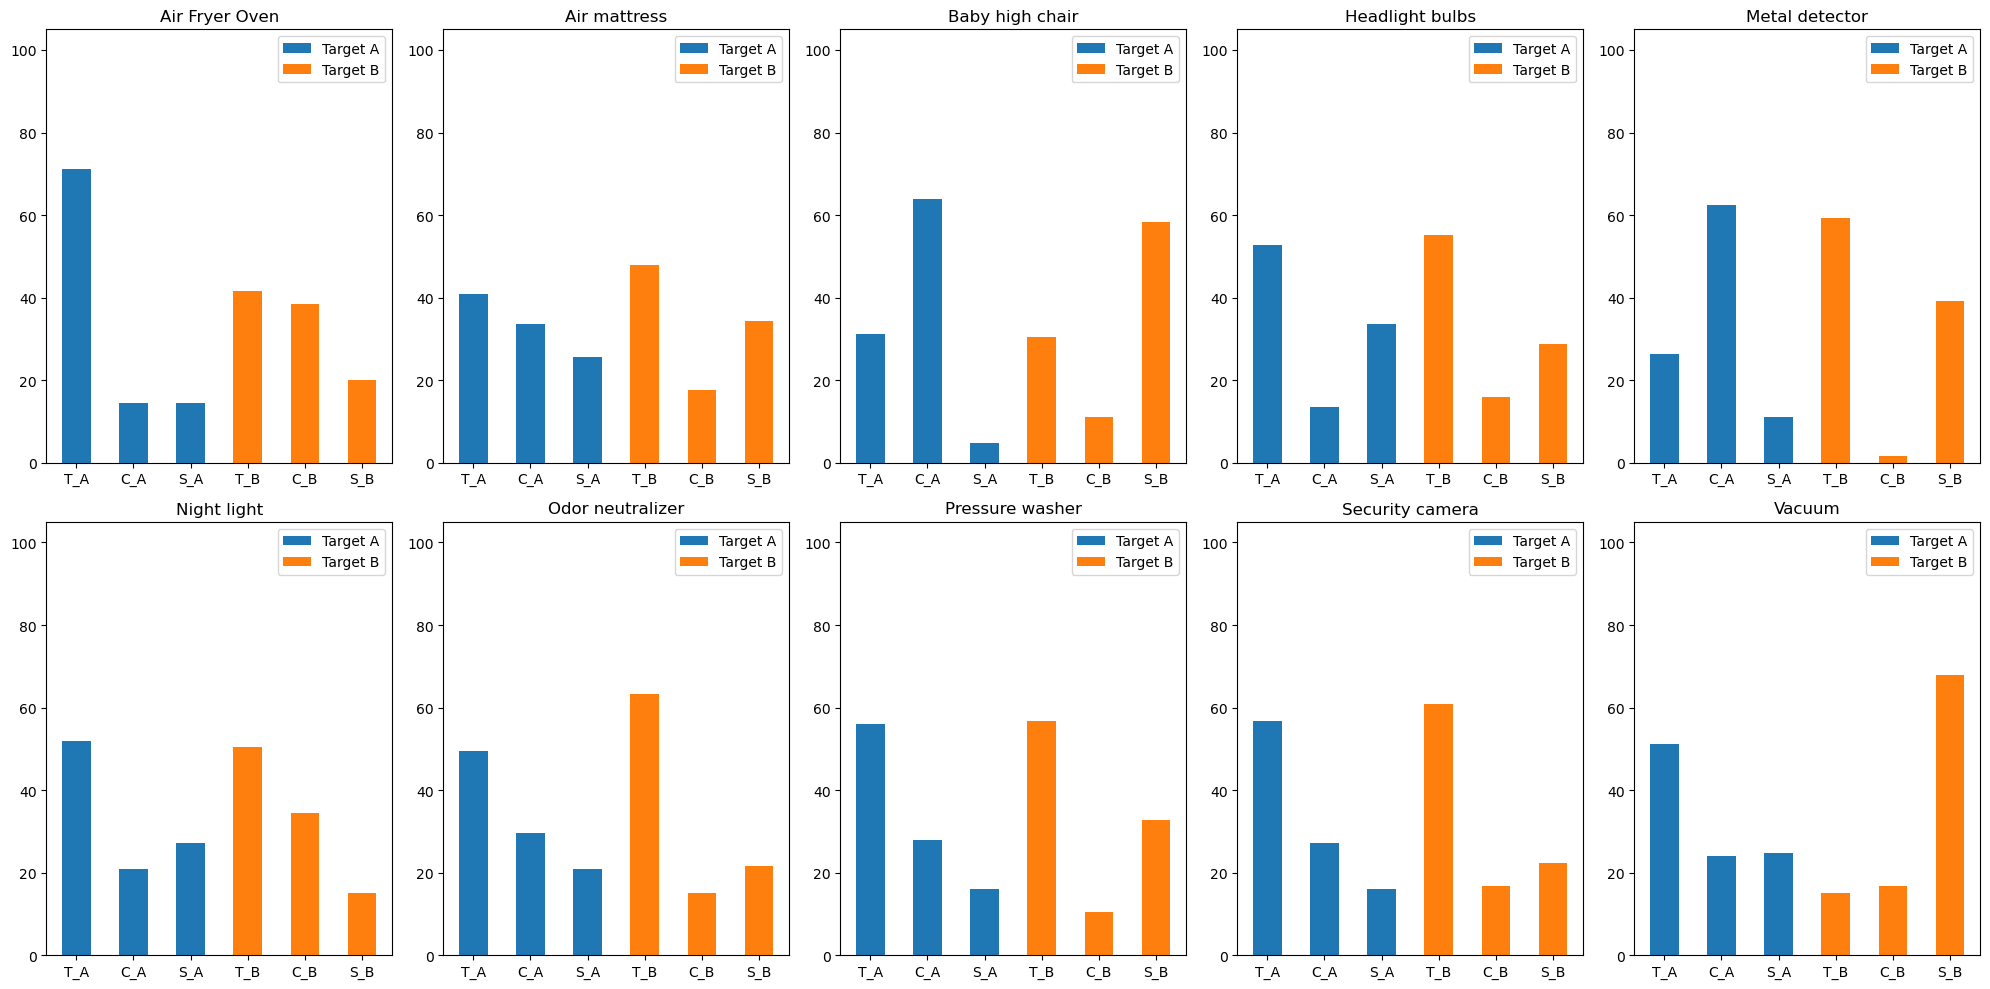

In [7]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))

# Biased items: "Baby high chair", "Metal detector", "Vacuum"

# Baby high chair would show a high similarity effect ... but the way we are computing the effect ignores the high attraction of the decoy item.

counter = 0

labels1 = ["T_A", "C_A", "S_A"]
labels2 = ["T_B", "C_B", "S_B"]

n = Sim_items_targets_A.shape[0]

for x in range(2):
    
    for xi in range(5):
        
        if (counter == (n)):
            counter = 0
        
        y1 = np.array([Sim_items_targets_A[counter], Sim_items_competitors_A[counter], Sim_items_decoys_A[counter]])
        y2 = np.array([Sim_items_targets_B[counter], Sim_items_competitors_B[counter], Sim_items_decoys_B[counter]])
        ax[x][xi].bar(labels1, y1, 0.5, capsize=8, label="Target A")
        ax[x][xi].bar(labels2, y2, 0.5, capsize=8, label="Target B")
        ax[x][xi].set_ylim(0, 105)
        ax[x][xi].set_title(item_list[counter])
        ax[x][xi].legend()
        counter = counter + 1

plt.tight_layout()

In [33]:
#decoy_S_Items_TargetA_df[decoy_S_Items_TargetA_df["Item"] == "Air purifier"]

#decoy_S_Items_TargetA_df.Item["Air purifier"]

item_list = decoy_S_TargetA_df["Item"].unique()
item_list = np.sort(item_list)
print(item_list)

decoy_S_Items_TargetA_df.loc[9, "Target(num)"]


['Air Fryer Oven' 'Air mattress' 'Baby high chair' 'Headlight bulbs'
 'Metal detector' 'Night light' 'Odor neutralizer' 'Pressure washer'
 'Security camera' 'Vacuum']


51

In [41]:
# Overall similarity effect for individual items. 

#decoy_S_Items_TargetA_df
#decoy_S_Items_TargetB_df

#item_list
decoy_S_Items_Overall_df =  pd.DataFrame(columns=['Item', 'Similarity Effect'])
   
for x in range(10):
    
    current_item_name = item_list[x]
    
    current_target_A = decoy_S_Items_TargetA_df.loc[x, "Target(num)"]
    current_target_B = decoy_S_Items_TargetB_df.loc[x, "Target(num)"]
    
    current_competitor_A = decoy_S_Items_TargetA_df.loc[x, "Competitor(num)"]
    current_competitor_B = decoy_S_Items_TargetB_df.loc[x, "Competitor(num)"]
    
    total_effect = (current_competitor_A+current_competitor_B)/(current_target_A+current_target_B+current_competitor_A+current_competitor_B)
    
    current_item = pd.DataFrame(data={'Item': current_item_name, 'Similarity Effect': total_effect}, index=range(1))
    
    decoy_S_Items_Overall_df = decoy_S_Items_Overall_df.append(current_item, ignore_index = True)
    
decoy_S_Items_Overall_df.head(10)

/var/folders/0z/1yt2h6410kb7_mgghf4q28z00000gn/T/ipykernel_18712/482233728.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  decoy_S_Items_Overall_df = decoy_S_Items_Overall_df.append(current_item, ignore_index = True)
/var/folders/0z/1yt2h6410kb7_mgghf4q28z00000gn/T/ipykernel_18712/482233728.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  decoy_S_Items_Overall_df = decoy_S_Items_Overall_df.append(current_item, ignore_index = True)
/var/folders/0z/1yt2h6410kb7_mgghf4q28z00000gn/T/ipykernel_18712/482233728.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  decoy_S_Items_Overall_df = decoy_S_Items_Overall_df.append(current_item, ignore_index = True)
/var/folders/0z/1yt2h6410kb7_mgghf4q28z00000gn/T/ipykernel_18712/48

,Item,Similarity Effect
0,Air Fryer Oven,0.318841
1,Air mattress,0.365714
2,Baby high chair,0.549708
3,Headlight bulbs,0.215116
4,Metal detector,0.427807
5,Night light,0.350254
6,Odor neutralizer,0.284264
7,Pressure washer,0.253968
8,Security camera,0.272277
9,Vacuum,0.380597


### Compromise Decoy

In [8]:
decoy_C_TargetA_df = decoy_C_df.loc[decoy_C_df['Option_1'].str.contains('C_A') | decoy_C_df['Option_2'].str.contains('C_A') | decoy_C_df['Option_3'].str.contains('C_A')]
decoy_C_TargetB_df = decoy_C_df.loc[decoy_C_df['Option_1'].str.contains('C_B') | decoy_C_df['Option_2'].str.contains('C_B') | decoy_C_df['Option_3'].str.contains('C_B')]

decoy_C_Items_TargetA_df = uf.itemFreq_Decoy(decoy_C_TargetA_df, "Com_Decoy")
decoy_C_Items_TargetB_df = uf.itemFreq_Decoy(decoy_C_TargetB_df, "Com_Decoy")

item_list = decoy_C_TargetA_df["Item"].unique()
item_list = np.sort(item_list)

Com_items_targets_A = np.array([])
Com_items_competitors_A = np.array([])
Com_items_decoys_A = np.array([])

Com_items_targets_B = np.array([])
Com_items_competitors_B = np.array([])
Com_items_decoys_B = np.array([])

for item in item_list:
    
    current_item_A = decoy_C_Items_TargetA_df[decoy_C_Items_TargetA_df["Item"] == item]
    current_item_B = decoy_C_Items_TargetB_df[decoy_C_Items_TargetB_df["Item"] == item]
    
    Com_items_targets_A = np.append(Com_items_targets_A, current_item_A["Target(%)"])
    Com_items_competitors_A = np.append(Com_items_competitors_A, current_item_A["Competitor(%)"])
    Com_items_decoys_A = np.append(Com_items_decoys_A, current_item_A["Com_Decoy(%)"])
    
    Com_items_targets_B = np.append(Com_items_targets_B, current_item_B["Target(%)"])
    Com_items_competitors_B = np.append(Com_items_competitors_B, current_item_B["Competitor(%)"])
    Com_items_decoys_B = np.append(Com_items_decoys_B, current_item_B["Com_Decoy(%)"])


/Users/luisalvarez/Documents/Decoy/22AY_01_Code/Useful_functions.py:315: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  freq_df = freq_df.append(current_item_freq, ignore_index = True)
/Users/luisalvarez/Documents/Decoy/22AY_01_Code/Useful_functions.py:315: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  freq_df = freq_df.append(current_item_freq, ignore_index = True)
/Users/luisalvarez/Documents/Decoy/22AY_01_Code/Useful_functions.py:315: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  freq_df = freq_df.append(current_item_freq, ignore_index = True)
/Users/luisalvarez/Documents/Decoy/22AY_01_Code/Useful_functions.py:315: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

In [9]:
decoy_C_Items_TargetA_df.sort_values(by=['Item'], inplace=True) 
#decoy_C_Items_TargetA_df.head(10)

In [10]:
decoy_C_Items_TargetB_df.sort_values(by=['Item'], inplace=True) 
#decoy_C_Items_TargetB_df.head(10)

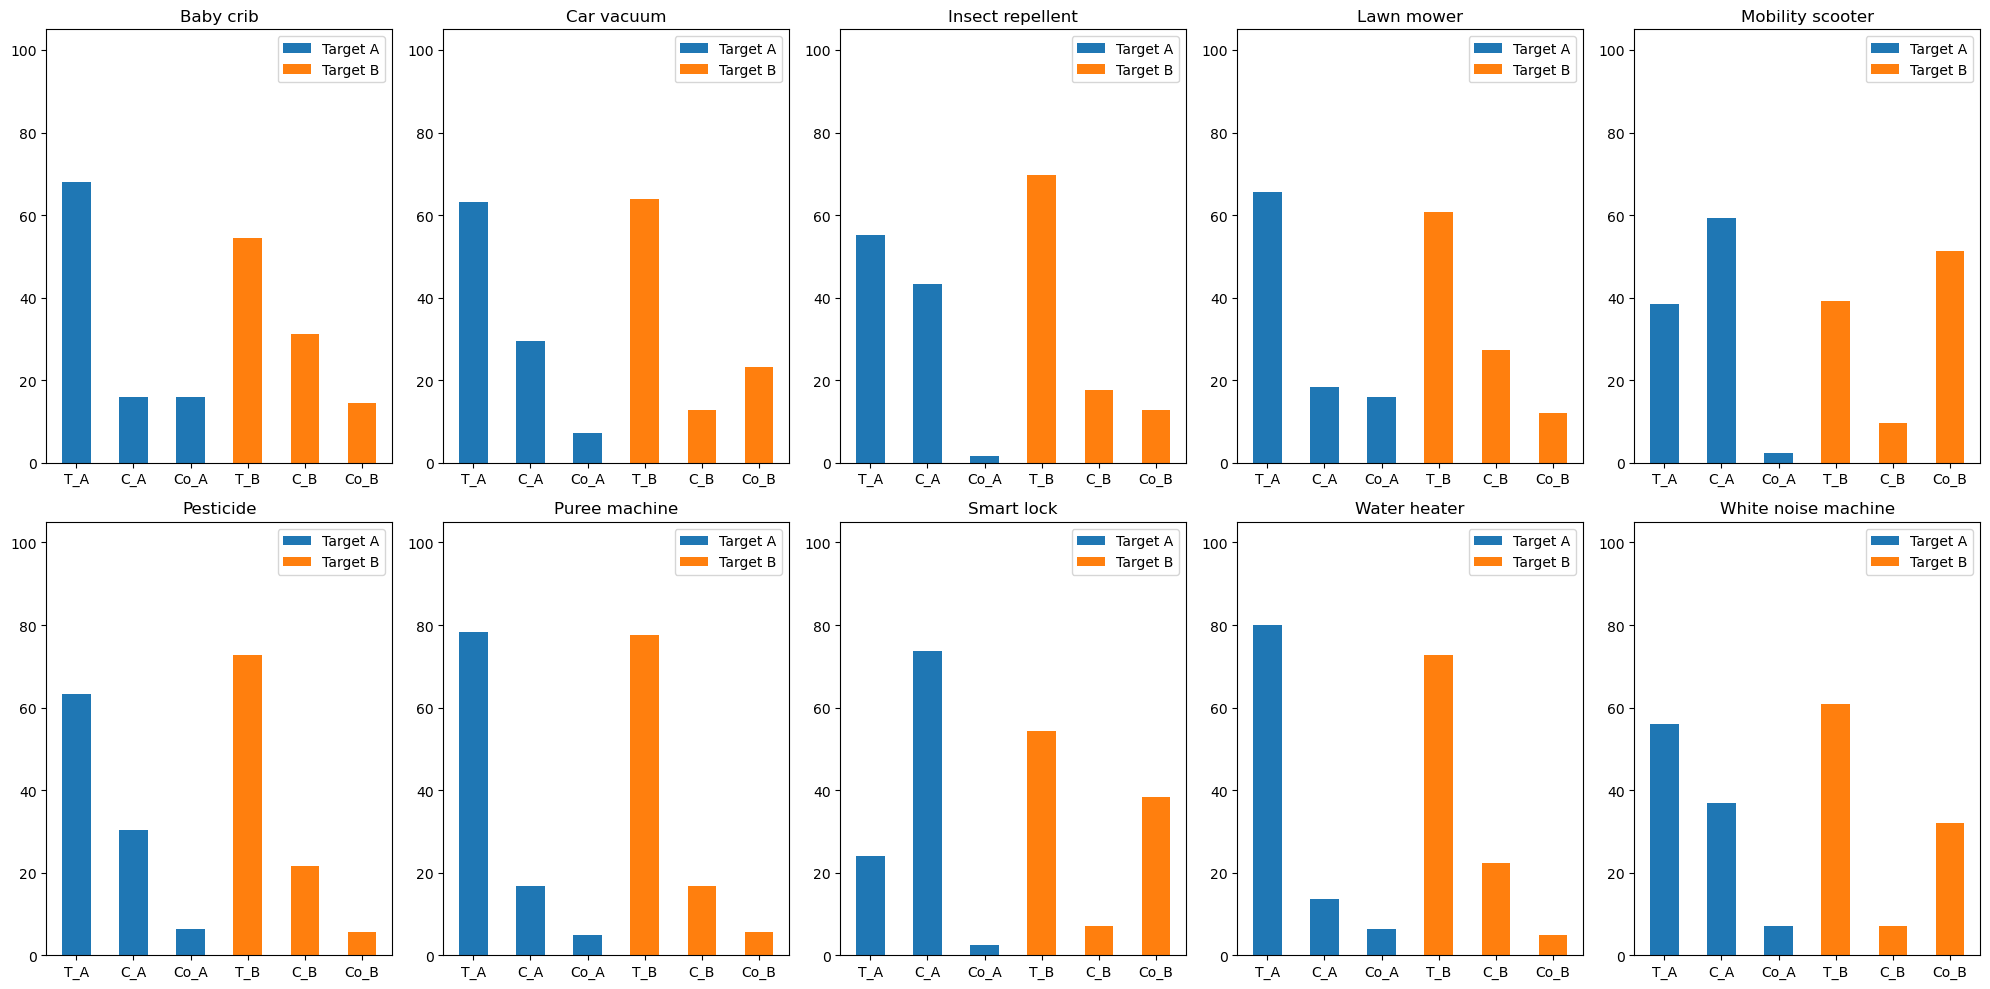

In [11]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))

# Biased items: "Mobility scooter", "Smart lock"

counter = 0

labels1 = ["T_A", "C_A", "Co_A"]
labels2 = ["T_B", "C_B", "Co_B"]

n = Com_items_targets_A.shape[0]

for x in range(2):
    
    for xi in range(5):
        
        if (counter == (n)):
            counter = 0
        
        y1 = np.array([Com_items_targets_A[counter], Com_items_competitors_A[counter], Com_items_decoys_A[counter]])
        y2 = np.array([Com_items_targets_B[counter], Com_items_competitors_B[counter], Com_items_decoys_B[counter]])
        ax[x][xi].bar(labels1, y1, 0.5, capsize=8, label="Target A")
        ax[x][xi].bar(labels2, y2, 0.5, capsize=8, label="Target B")
        ax[x][xi].set_ylim(0, 105)
        ax[x][xi].set_title(item_list[counter])
        ax[x][xi].legend()
        counter = counter + 1

plt.tight_layout()

In [43]:
decoy_C_Items_Overall_df =  pd.DataFrame(columns=['Item', 'Compromise Effect'])

item_list = decoy_C_TargetA_df["Item"].unique()
item_list = np.sort(item_list)
   
for x in range(10):
    
    current_item_name = item_list[x]
    
    current_target_A = decoy_C_Items_TargetA_df.loc[x, "Target(num)"]
    current_target_B = decoy_C_Items_TargetB_df.loc[x, "Target(num)"]
    
    current_competitor_A = decoy_C_Items_TargetA_df.loc[x, "Competitor(num)"]
    current_competitor_B = decoy_C_Items_TargetB_df.loc[x, "Competitor(num)"]
    
    total_effect = (current_target_A+current_target_B)/(current_target_A+current_target_B+current_competitor_A+current_competitor_B)
    
    current_item = pd.DataFrame(data={'Item': current_item_name, 'Compromise Effect': total_effect}, index=range(1))
    
    decoy_C_Items_Overall_df = decoy_C_Items_Overall_df.append(current_item, ignore_index = True)
    
decoy_C_Items_Overall_df.head(10)


/var/folders/0z/1yt2h6410kb7_mgghf4q28z00000gn/T/ipykernel_18712/2043858046.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  decoy_C_Items_Overall_df = decoy_C_Items_Overall_df.append(current_item, ignore_index = True)
/var/folders/0z/1yt2h6410kb7_mgghf4q28z00000gn/T/ipykernel_18712/2043858046.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  decoy_C_Items_Overall_df = decoy_C_Items_Overall_df.append(current_item, ignore_index = True)
/var/folders/0z/1yt2h6410kb7_mgghf4q28z00000gn/T/ipykernel_18712/2043858046.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  decoy_C_Items_Overall_df = decoy_C_Items_Overall_df.append(current_item, ignore_index = True)
/var/folders/0z/1yt2h6410kb7_mgghf4q28z00000gn/T/ipykernel_18712

,Item,Compromise Effect
0,Baby crib,0.840659
1,Car vacuum,0.775330
2,Insect repellent,0.726496
3,Lawn mower,0.604167
4,Mobility scooter,0.697778
5,Pesticide,0.767327
6,Puree machine,0.595652
7,Smart lock,0.794118
8,Water heater,0.504587
9,White noise machine,0.789157


### Attraction Decoy

In [12]:
decoy_A_TargetA_df = decoy_A_df.loc[decoy_A_df['Option_1'].str.contains('A_A') | decoy_A_df['Option_2'].str.contains('A_A') | decoy_A_df['Option_3'].str.contains('A_A')]
decoy_A_TargetB_df = decoy_A_df.loc[decoy_A_df['Option_1'].str.contains('A_B') | decoy_A_df['Option_2'].str.contains('A_B') | decoy_A_df['Option_3'].str.contains('A_B')]

decoy_A_Items_TargetA_df = uf.itemFreq_Decoy(decoy_A_TargetA_df, "Att_Decoy")
decoy_A_Items_TargetB_df = uf.itemFreq_Decoy(decoy_A_TargetB_df, "Att_Decoy")

item_list = decoy_A_TargetA_df["Item"].unique()
item_list = np.sort(item_list)

Att_items_targets_A = np.array([])
Att_items_competitors_A = np.array([])
Att_items_decoys_A = np.array([])

Att_items_targets_B = np.array([])
Att_items_competitors_B = np.array([])
Att_items_decoys_B = np.array([])

for item in item_list:
    
    current_item_A = decoy_A_Items_TargetA_df[decoy_A_Items_TargetA_df["Item"] == item]
    current_item_B = decoy_A_Items_TargetB_df[decoy_A_Items_TargetB_df["Item"] == item]
    
    Att_items_targets_A = np.append(Att_items_targets_A, current_item_A["Target(%)"])
    Att_items_competitors_A = np.append(Att_items_competitors_A, current_item_A["Competitor(%)"])
    Att_items_decoys_A = np.append(Att_items_decoys_A, current_item_A["Att_Decoy(%)"])
    
    Att_items_targets_B = np.append(Att_items_targets_B, current_item_B["Target(%)"])
    Att_items_competitors_B = np.append(Att_items_competitors_B, current_item_B["Competitor(%)"])
    Att_items_decoys_B = np.append(Att_items_decoys_B, current_item_B["Att_Decoy(%)"])


/Users/luisalvarez/Documents/Decoy/22AY_01_Code/Useful_functions.py:315: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  freq_df = freq_df.append(current_item_freq, ignore_index = True)
/Users/luisalvarez/Documents/Decoy/22AY_01_Code/Useful_functions.py:315: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  freq_df = freq_df.append(current_item_freq, ignore_index = True)
/Users/luisalvarez/Documents/Decoy/22AY_01_Code/Useful_functions.py:315: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  freq_df = freq_df.append(current_item_freq, ignore_index = True)
/Users/luisalvarez/Documents/Decoy/22AY_01_Code/Useful_functions.py:315: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Us

In [13]:
decoy_A_Items_TargetA_df.sort_values(by=['Item'], inplace=True) 
#decoy_A_Items_TargetA_df.head(10)

In [14]:
decoy_A_Items_TargetB_df.sort_values(by=['Item'], inplace=True) 
#decoy_A_Items_TargetB_df.head(10)

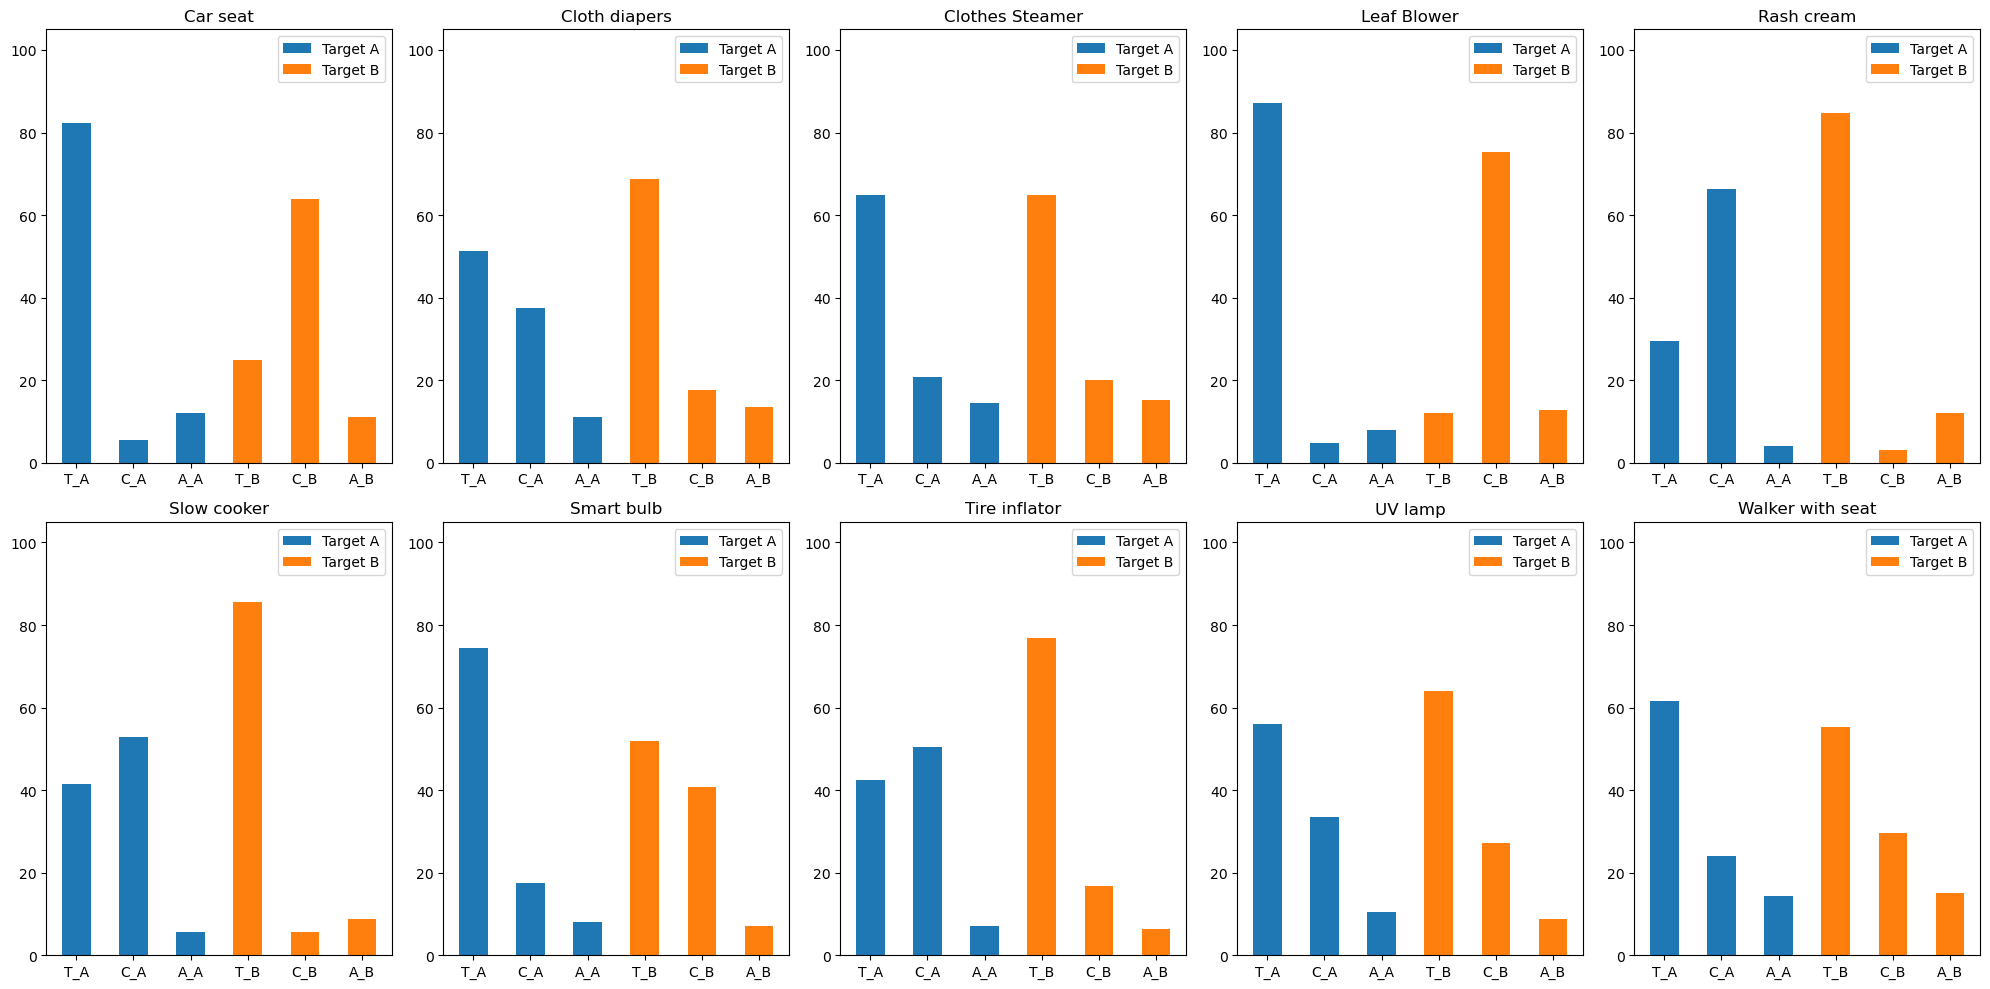

In [15]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))

# Biased items: "Car seat", "Leaf Blower", "Rash cream", "Slow cooker", "Tire inflator"

counter = 0

labels1 = ["T_A", "C_A", "A_A"]
labels2 = ["T_B", "C_B", "A_B"]

n = Att_items_targets_A.shape[0]

for x in range(2):
    
    for xi in range(5):
        
        if (counter == (n)):
            counter = 0
        
        y1 = np.array([Att_items_targets_A[counter], Att_items_competitors_A[counter], Att_items_decoys_A[counter]])
        y2 = np.array([Att_items_targets_B[counter], Att_items_competitors_B[counter], Att_items_decoys_B[counter]])
        ax[x][xi].bar(labels1, y1, 0.5, capsize=8, label="Target A")
        ax[x][xi].bar(labels2, y2, 0.5, capsize=8, label="Target B")
        ax[x][xi].set_ylim(0, 105)
        ax[x][xi].set_title(item_list[counter])
        ax[x][xi].legend()
        counter = counter + 1

plt.tight_layout()

In [45]:
decoy_A_Items_Overall_df =  pd.DataFrame(columns=['Item', 'Attraction Effect'])

item_list = decoy_A_TargetA_df["Item"].unique()
item_list = np.sort(item_list)
   
for x in range(10):
    
    current_item_name = item_list[x]
    
    current_target_A = decoy_A_Items_TargetA_df.loc[x, "Target(num)"]
    current_target_B = decoy_A_Items_TargetB_df.loc[x, "Target(num)"]
    
    current_competitor_A = decoy_A_Items_TargetA_df.loc[x, "Competitor(num)"]
    current_competitor_B = decoy_A_Items_TargetB_df.loc[x, "Competitor(num)"]
    
    total_effect = (current_target_A+current_target_B)/(current_target_A+current_target_B+current_competitor_A+current_competitor_B)
    
    current_item = pd.DataFrame(data={'Item': current_item_name, 'Attraction Effect': total_effect}, index=range(1))
    
    decoy_A_Items_Overall_df = decoy_A_Items_Overall_df.append(current_item, ignore_index = True)
    
decoy_A_Items_Overall_df.head(10)

/var/folders/0z/1yt2h6410kb7_mgghf4q28z00000gn/T/ipykernel_18712/1548328079.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  decoy_A_Items_Overall_df = decoy_A_Items_Overall_df.append(current_item, ignore_index = True)
/var/folders/0z/1yt2h6410kb7_mgghf4q28z00000gn/T/ipykernel_18712/1548328079.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  decoy_A_Items_Overall_df = decoy_A_Items_Overall_df.append(current_item, ignore_index = True)
/var/folders/0z/1yt2h6410kb7_mgghf4q28z00000gn/T/ipykernel_18712/1548328079.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  decoy_A_Items_Overall_df = decoy_A_Items_Overall_df.append(current_item, ignore_index = True)
/var/folders/0z/1yt2h6410kb7_mgghf4q28z00000gn/T/ipykernel_18712

,Item,Attraction Effect
0,Car seat,0.482143
1,Cloth diapers,0.610619
2,Clothes Steamer,0.469027
3,Leaf Blower,0.578261
4,Rash cream,0.790179
5,Slow cooker,0.851852
6,Smart bulb,0.636771
7,Tire inflator,0.955556
8,UV lamp,0.760000
9,Walker with seat,0.452915


### Phantom Decoy

In [16]:
decoy_P_TargetA_df = decoy_P_df.loc[decoy_P_df['Option_1'].str.contains('P_A') | decoy_P_df['Option_2'].str.contains('P_A') | decoy_P_df['Option_3'].str.contains('P_A')]
decoy_P_TargetB_df = decoy_P_df.loc[decoy_P_df['Option_1'].str.contains('P_B') | decoy_P_df['Option_2'].str.contains('P_B') | decoy_P_df['Option_3'].str.contains('P_B')]

# Only looking at "Weakly_desirable" condition, as it is sort of a control group.
#decoy_P_TargetA_df = decoy_P_TargetA_df[decoy_P_TargetA_df["PhantomCondition"] == "Weakly_desirable"]
#decoy_P_TargetB_df = decoy_P_TargetB_df[decoy_P_TargetB_df["PhantomCondition"] == "Weakly_desirable"]

# "Weakly desirable" -> "Dehumidifier", "Organic fertilizer" "Wifi extender"
# "Highly desirable" -> "Baby stroller", "Dehumidifier", "Electric mop", "Organic fertilizer", "Paint sprayer"
# "Undesirable" ->

decoy_P_Items_TargetA_df = uf.itemFreq_PhantomDecoy(decoy_P_TargetA_df)
decoy_P_Items_TargetB_df = uf.itemFreq_PhantomDecoy(decoy_P_TargetB_df)

item_list = decoy_P_TargetA_df["Item"].unique()
item_list = np.sort(item_list)

Phan_items_targets_A = np.array([])
Phan_items_competitors_A = np.array([])

Phan_items_targets_B = np.array([])
Phan_items_competitors_B = np.array([])

for item in item_list:
    
    current_item_A = decoy_P_Items_TargetA_df[decoy_P_Items_TargetA_df["Item"] == item]
    current_item_B = decoy_P_Items_TargetB_df[decoy_P_Items_TargetB_df["Item"] == item]
    
    Phan_items_targets_A = np.append(Phan_items_targets_A, current_item_A["Target(%)"])
    Phan_items_competitors_A = np.append(Phan_items_competitors_A, current_item_A["Competitor(%)"])
    
    Phan_items_targets_B = np.append(Phan_items_targets_B, current_item_B["Target(%)"])
    Phan_items_competitors_B = np.append(Phan_items_competitors_B, current_item_B["Competitor(%)"])

    

/Users/luisalvarez/Documents/Decoy/22AY_01_Code/Useful_functions.py:414: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  freq_df = freq_df.append(current_participant_freq, ignore_index = True)
/Users/luisalvarez/Documents/Decoy/22AY_01_Code/Useful_functions.py:414: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  freq_df = freq_df.append(current_participant_freq, ignore_index = True)
/Users/luisalvarez/Documents/Decoy/22AY_01_Code/Useful_functions.py:414: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  freq_df = freq_df.append(current_participant_freq, ignore_index = True)
/Users/luisalvarez/Documents/Decoy/22AY_01_Code/Useful_functions.py:414: FutureWarning: The frame.append method is deprecated and will be removed from pandas in

In [17]:
decoy_P_Items_TargetA_df.sort_values(by=['Item'], inplace=True) 
#decoy_P_Items_TargetA_df.head(10)

In [18]:
decoy_P_Items_TargetB_df.sort_values(by=['Item'], inplace=True) 
#decoy_P_Items_TargetB_df.head(10)

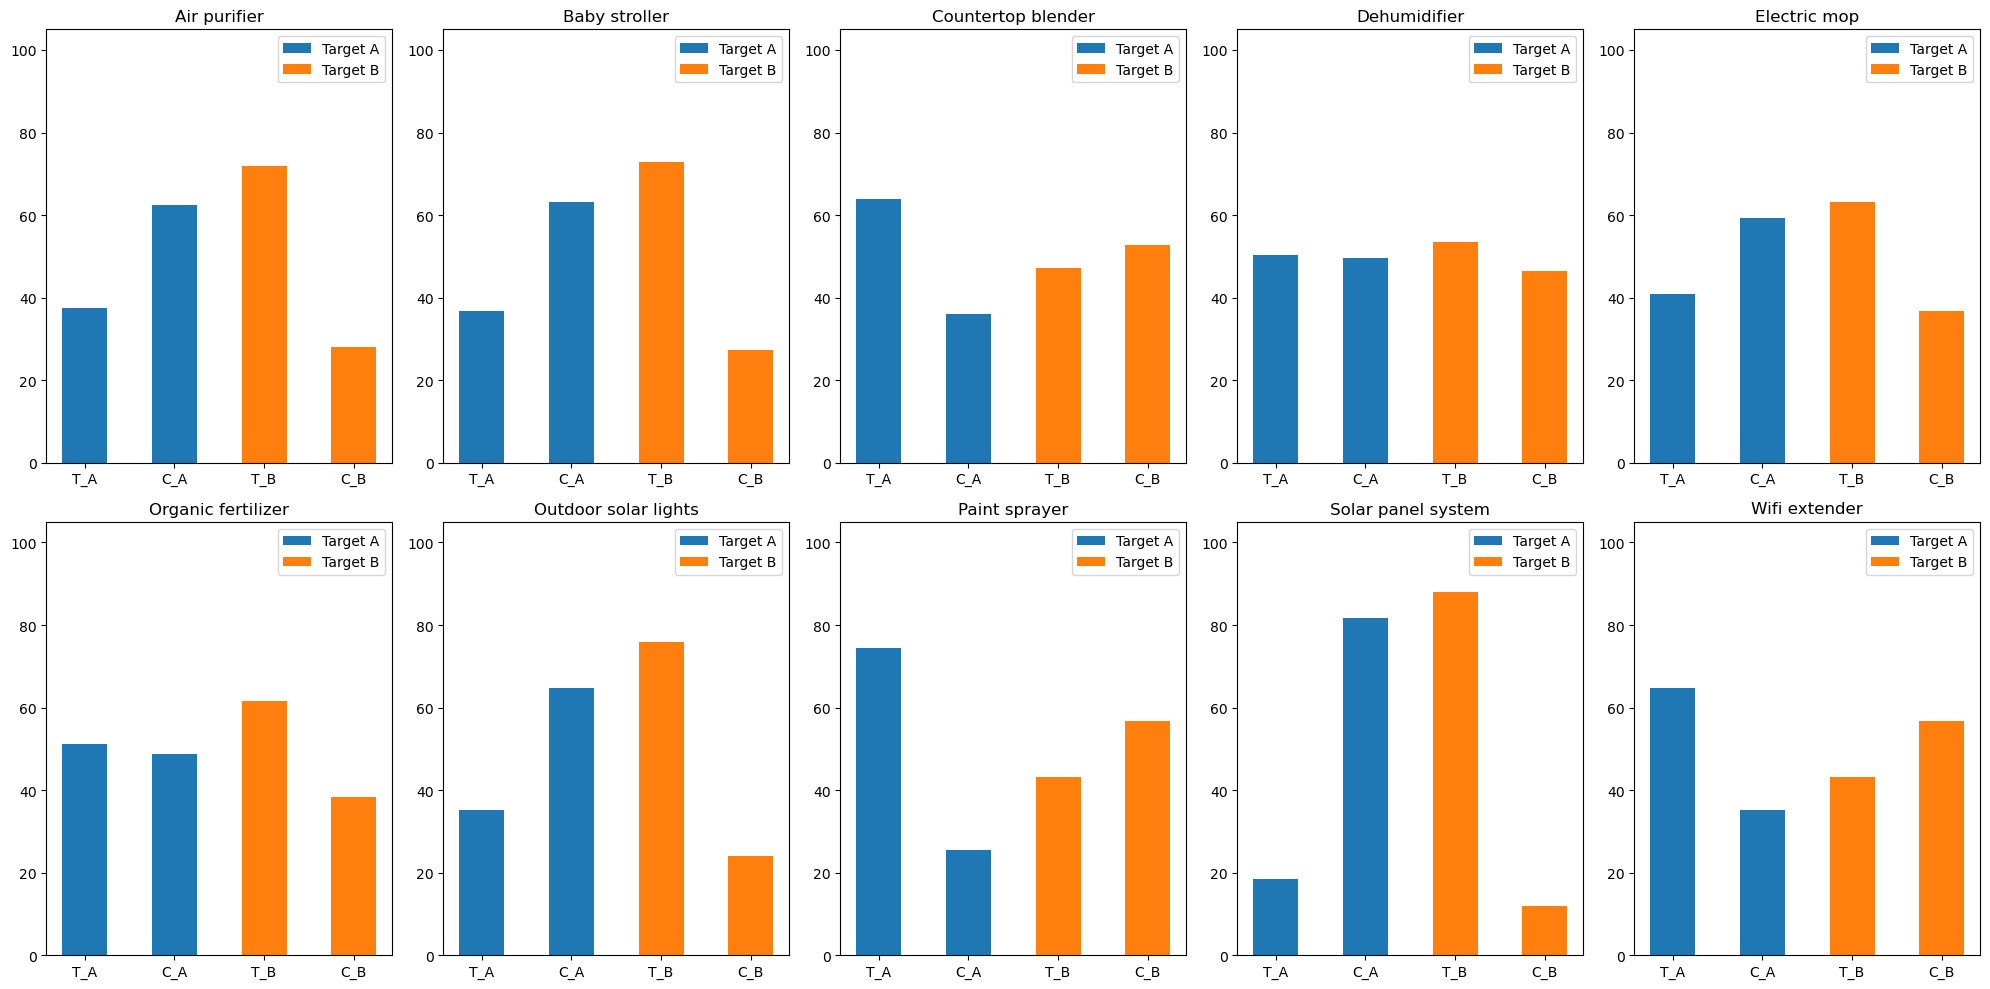

In [19]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))

counter = 0

labels1 = ["T_A", "C_A"]
labels2 = ["T_B", "C_B"]

n = item_list.shape[0]

for x in range(2):
    
    for xi in range(5):
        
        if (counter == (n)):
            counter = 0
        
        y1 = np.array([Phan_items_targets_A[counter], Phan_items_competitors_A[counter]])
        y2 = np.array([Phan_items_targets_B[counter], Phan_items_competitors_B[counter]])
        ax[x][xi].bar(labels1, y1, 0.5, capsize=8, label="Target A")
        ax[x][xi].bar(labels2, y2, 0.5, capsize=8, label="Target B")
        ax[x][xi].set_ylim(0, 105)
        ax[x][xi].set_title(item_list[counter])
        ax[x][xi].legend()
        counter = counter + 1

plt.tight_layout()

In [54]:
decoy_P_Items_Overall_df =  pd.DataFrame(columns=['Item', 'Phantom Effect'])

item_list = decoy_P_Items_TargetA_df["Item"].unique()
item_list = np.sort(item_list)
   
for x in range(10):
    
    current_item_name = item_list[x]
    
    current_target_A = decoy_P_Items_TargetA_df.loc[x, "Target(num)"]
    current_target_B = decoy_P_Items_TargetB_df.loc[x, "Target(num)"]
    
    current_competitor_A = decoy_P_Items_TargetA_df.loc[x, "Competitor(num)"]
    current_competitor_B = decoy_P_Items_TargetB_df.loc[x, "Competitor(num)"]
    
    total_effect = (current_target_A+current_target_B)/(current_target_A+current_target_B+current_competitor_A+current_competitor_B)
    
    current_item = pd.DataFrame(data={'Item': current_item_name, 'Phantom Effect': total_effect}, index=range(1))
    
    decoy_P_Items_Overall_df = decoy_P_Items_Overall_df.append(current_item, ignore_index = True)
    
decoy_P_Items_Overall_df.head(10)


/var/folders/0z/1yt2h6410kb7_mgghf4q28z00000gn/T/ipykernel_18712/1057711742.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  decoy_P_Items_Overall_df = decoy_P_Items_Overall_df.append(current_item, ignore_index = True)
/var/folders/0z/1yt2h6410kb7_mgghf4q28z00000gn/T/ipykernel_18712/1057711742.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  decoy_P_Items_Overall_df = decoy_P_Items_Overall_df.append(current_item, ignore_index = True)
/var/folders/0z/1yt2h6410kb7_mgghf4q28z00000gn/T/ipykernel_18712/1057711742.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  decoy_P_Items_Overall_df = decoy_P_Items_Overall_df.append(current_item, ignore_index = True)
/var/folders/0z/1yt2h6410kb7_mgghf4q28z00000gn/T/ipykernel_18712

,Item,Phantom Effect
0,Air purifier,0.472
1,Baby stroller,0.568
2,Countertop blender,0.328
3,Dehumidifier,0.404
4,Electric mop,0.752
5,Organic fertilizer,0.684
6,Outdoor solar lights,0.624
7,Paint sprayer,0.444
8,Solar panel system,0.632
9,Wifi extender,0.564




# Combined Scores (Target A & B) for all scenarios

In [49]:
decoy_A_Items_Overall_df.head(10)

,Item,Attraction Effect
0,Car seat,0.482143
1,Cloth diapers,0.610619
2,Clothes Steamer,0.469027
3,Leaf Blower,0.578261
4,Rash cream,0.790179
5,Slow cooker,0.851852
6,Smart bulb,0.636771
7,Tire inflator,0.955556
8,UV lamp,0.760000
9,Walker with seat,0.452915


In [50]:
decoy_C_Items_Overall_df.head(10)

,Item,Compromise Effect
0,Baby crib,0.840659
1,Car vacuum,0.775330
2,Insect repellent,0.726496
3,Lawn mower,0.604167
4,Mobility scooter,0.697778
5,Pesticide,0.767327
6,Puree machine,0.595652
7,Smart lock,0.794118
8,Water heater,0.504587
9,White noise machine,0.789157


In [51]:
decoy_S_Items_Overall_df.head(10)

,Item,Similarity Effect
0,Air Fryer Oven,0.318841
1,Air mattress,0.365714
2,Baby high chair,0.549708
3,Headlight bulbs,0.215116
4,Metal detector,0.427807
5,Night light,0.350254
6,Odor neutralizer,0.284264
7,Pressure washer,0.253968
8,Security camera,0.272277
9,Vacuum,0.380597


In [55]:
decoy_P_Items_Overall_df.head(10)

,Item,Phantom Effect
0,Air purifier,0.472
1,Baby stroller,0.568
2,Countertop blender,0.328
3,Dehumidifier,0.404
4,Electric mop,0.752
5,Organic fertilizer,0.684
6,Outdoor solar lights,0.624
7,Paint sprayer,0.444
8,Solar panel system,0.632
9,Wifi extender,0.564
